In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

data_folder_path = Path().absolute().parent / 'data'

# todo: make sure the dataset is downloaded and extracted
# todo: expand the dataset to LOLv2 or create a separate training for the LOLv2 dataset after traing the LOLv1 dataset
# todo: improvise the structure

dataset_path = data_folder_path / 'LOLv1'

train_input_path = dataset_path / 'Train' / 'input'
train_target_path = dataset_path / 'Train' / 'target'

test_input_path = dataset_path / 'Test' / 'input'
test_target_path = dataset_path / 'Test' / 'target'

# list the train and test images in the dataset
# todo: show some sample images too
print('Train images:', len(os.listdir(train_input_path)))
print('Test images:', len(os.listdir(test_input_path)))


Train images: 485
Test images: 15


In [3]:
import test
from data_preparation import *


train_dataset = preprocess_dataset(train_input_path, train_target_path)
test_dataset = preprocess_dataset(test_input_path, test_target_path)

train_dataset, val_dataset = split_dataset(train_dataset)



Found 485 files.
Found 485 files.
Found 15 files.
Found 15 files.


Train images - 388 
Validation images - 97 
Test images - 15 


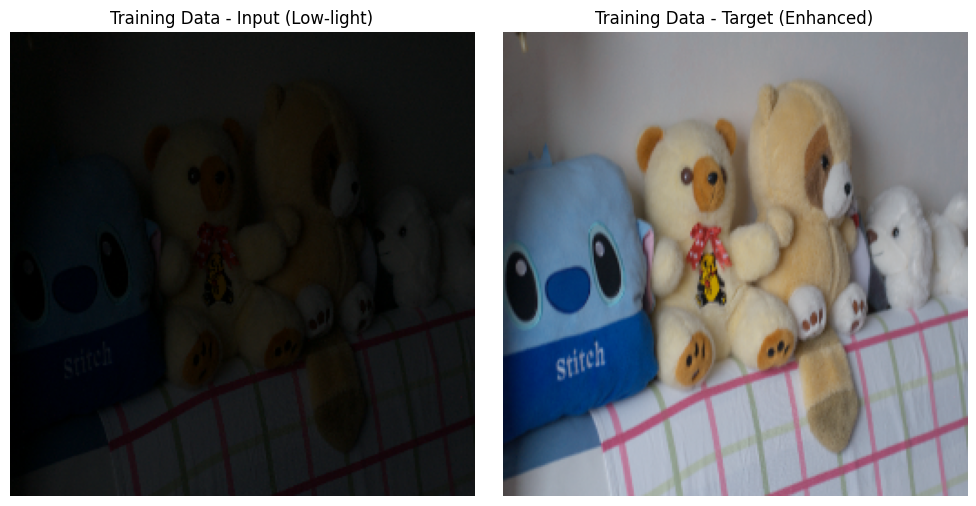

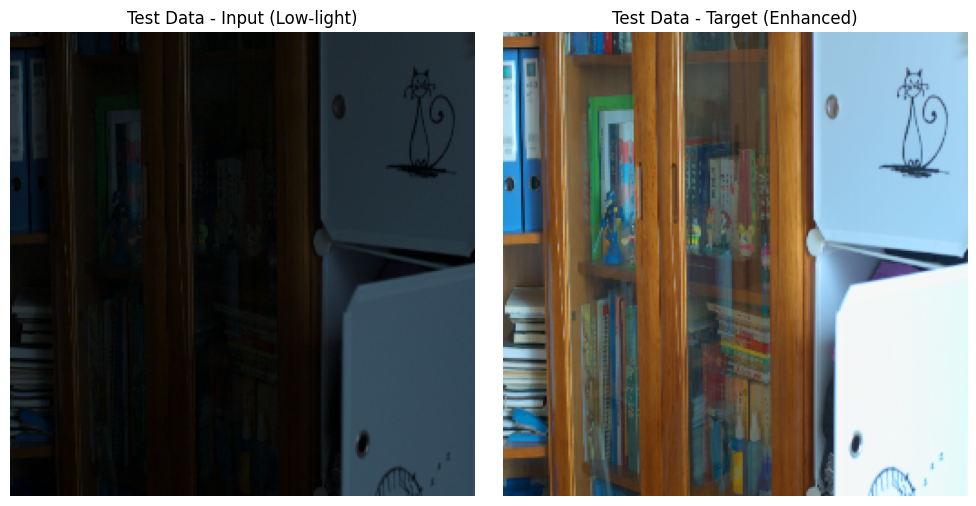

In [4]:
print(f"Train images - {len(train_dataset)} ")
print(f"Validation images - {len(val_dataset)} ")
print(f"Test images - {len(test_dataset)} ")

plot_sample_image(train_dataset, "Training Data")
plot_sample_image(test_dataset, "Test Data")

In [5]:
for input_images, target_images in train_dataset.take(1):
    print(input_images[0].shape)


import lyt_model


input_shape = (256,256,3)
batch_size = 1

lyt = lyt_model.LYT(input_shape)
lyt.summary()


(256, 256, 3)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ [(None, 256, 256, │          0 │ input_layer[0][0] │
│                     │ 1), (None, 256,   │            │                   │
│                     │ 256, 1), (None,   │            │                   │
│                     │ 256, 256, 1)]     │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │        160 │ lambda[0][1]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 256, 256,  │        160 │ lambda[0][2]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      2,320 │ conv2d_2[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 128, 128,  │      2,320 │ conv2d_9[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │      2,320 │ conv2d_3[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_10[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │      2,320 │ conv2d_4[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │      2,320 │ conv2d_11[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_5[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_5[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_12[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32, 32,    │        272 │ conv2d_12[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_10 (Lambda)  │ (None, 32, 32, 4) │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_11 (Lambda)  │ (None, 32, 32, 4) │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_19 (Lambda)  │ (None, 32, 32, 4) │          0 │ dense_8[0][0]   

 Total params: 54,139 (211.48 KB)

 Trainable params: 54,139 (211.48 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from loss import *
import tensorflow as tf
def psnr(y_true, y_pred):
    return 40 - psnr_loss(y_true, y_pred)

def ssim(y_true, y_pred):
    return 1 - ms_ssim_loss(y_true, y_pred)

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)


In [7]:
lyt.compile(optimizer=optimizer, loss=hybrid_loss, metrics=[psnr, ssim])

In [ ]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_lyt_model.keras',
    save_best_only=True,
    monitor='val_psnr',
    mode='max',
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)



history = lyt.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20, 
    callbacks=[checkpoint_callback,early_stopping]
)

Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 2433.8984 - psnr: 8.8525 - ssim: 0.3962
Epoch 1: val_psnr improved from -inf to 18.35840, saving model to best_lyt_model.keras
388/388 ━━━━━━━━━━━━━━━━━━━━ 2834s 7s/step - loss: 2432.1404 - psnr: 8.8619 - ssim: 0.3968 - val_loss: 688.2861 - val_psnr: 18.3584 - val_ssim: 0.8983
Epoch 2/20
253/388 ━━━━━━━━━━━━━━━━━━━━ 3:19:19 89s/step - loss: 825.5948 - psnr: 17.2827 - ssim: 0.8833

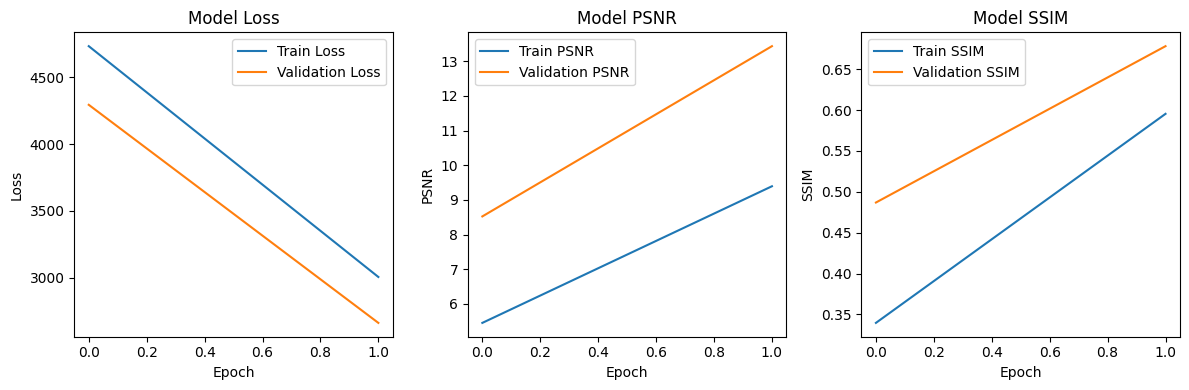

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['psnr'], label='Train PSNR')
plt.plot(history.history['val_psnr'], label='Validation PSNR')
plt.title('Model PSNR')
plt.xlabel('Epoch')
plt.ylabel('PSNR')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['ssim'], label='Train SSIM')
plt.plot(history.history['val_ssim'], label='Validation SSIM')
plt.title('Model SSIM')
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.legend()

plt.tight_layout()
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


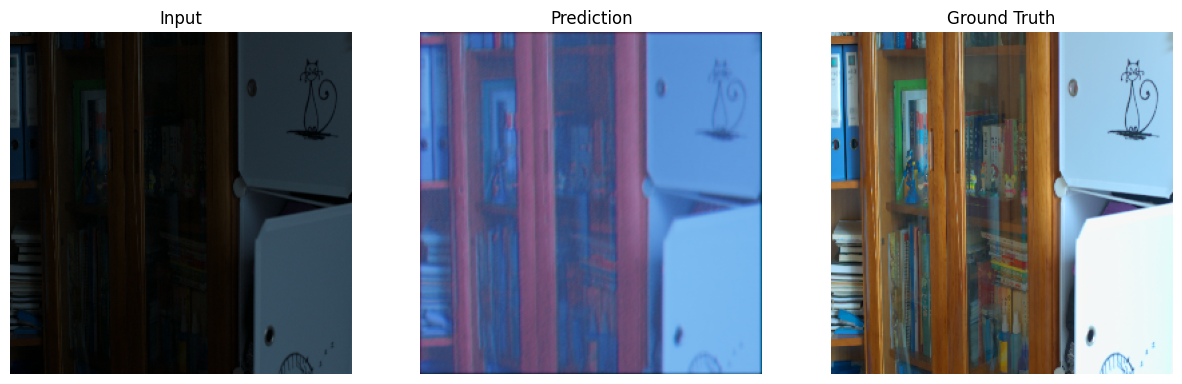

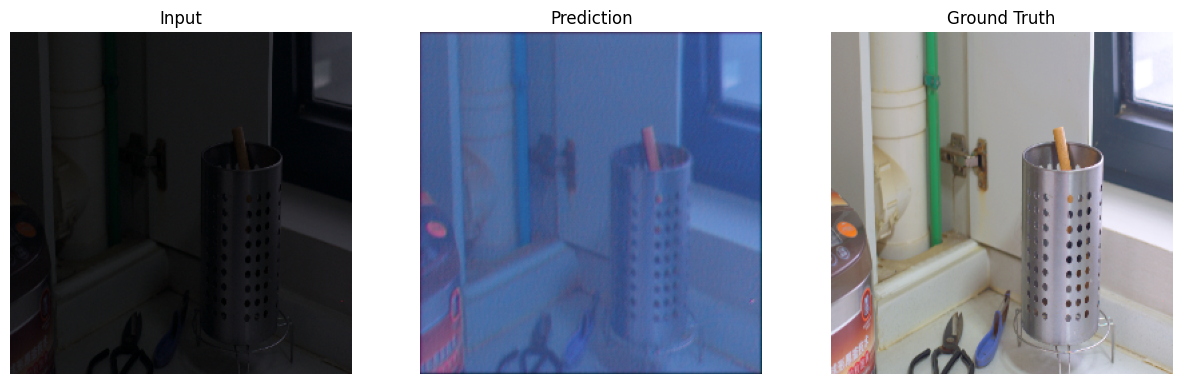

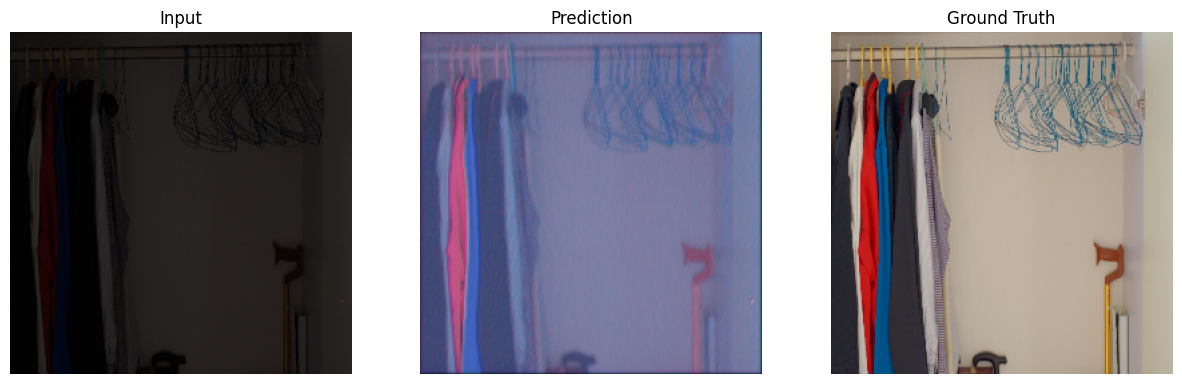

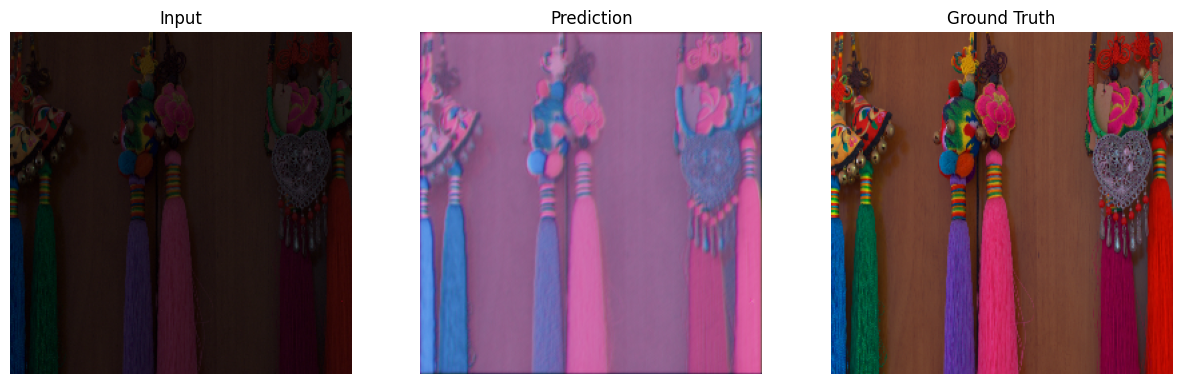

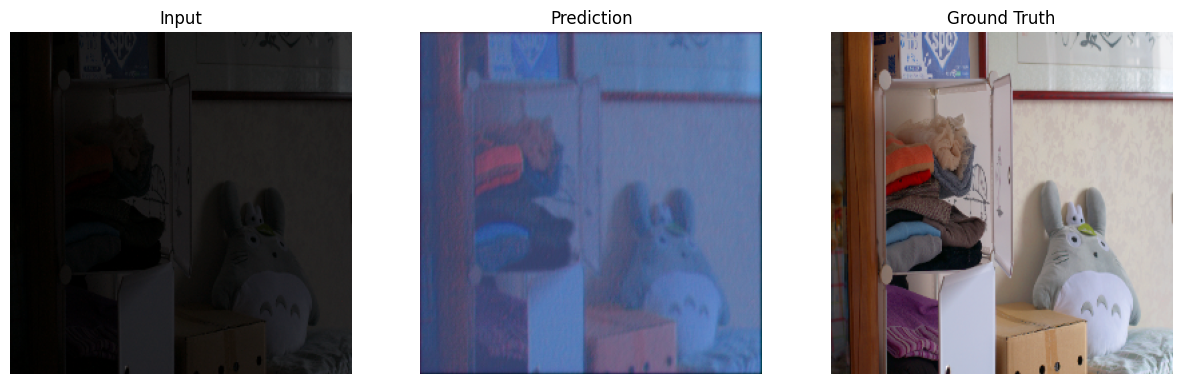

In [ ]:
predictions = lyt.predict(test_dataset)

for idx, (inputs, ground_truth) in enumerate(test_dataset.take(5)):
        input_image = inputs[0].numpy()  
        predicted_image = predictions[idx] 
        ground_truth_image = ground_truth[0].numpy()  

        plt.figure(figsize=(15, 5))
           
        plt.subplot(1, 3, 1)
        plt.imshow(input_image)
        plt.title('Input')
        plt.axis('off')
            
        plt.subplot(1, 3, 2)
        plt.imshow(predicted_image)
        plt.title(f'Prediction')
        plt.axis('off')
            
        plt.subplot(1, 3, 3)
        plt.imshow(ground_truth_image)
        plt.title(f'Ground Truth')
        plt.axis('off')
           

In [ ]:
# todo: (in last cell) read all the images that need to be predicted from predict folder and predict the output using trained model and output it in the jupyter notebook